##🛠️ Preparación de los Datos

### Carga del archivo CSV

In [2]:
import pandas as pd

In [3]:
# Carga de datos tratados
df = pd.read_csv('/content/datos_tratados.csv')

### *Visualización rápida de las primeras filas*

In [4]:
df.head()

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,...,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales,cuentas_diarias,cantidad_servicios
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,DSL,...,Yes,Yes,No,One year,1,Cheque por correo,65.6,593.30,2.155059,5
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Yes,DSL,...,No,No,Yes,Month-to-month,0,Cheque por correo,59.9,542.40,1.967806,4
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,No,Fibra óptica,...,No,No,No,Month-to-month,1,Cheque electrónico,73.9,280.85,2.427727,3
3,0011-IGKFF,1,Masculino,1,1,0,13,1,No,Fibra óptica,...,No,Yes,Yes,Month-to-month,1,Cheque electrónico,98.0,1237.85,3.219448,6
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,No,Fibra óptica,...,Yes,Yes,No,Month-to-month,1,Cheque por correo,83.9,267.40,2.756242,4


### *Visualizacion de la informacion del dataframe*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7256 non-null   object 
 1   churn                         7256 non-null   int64  
 2   género                        7256 non-null   object 
 3   cuidadano_mayor               7256 non-null   int64  
 4   pareja                        7256 non-null   int64  
 5   dependientes                  7256 non-null   int64  
 6   meses_de_contrato             7256 non-null   int64  
 7   servicio_telefonico           7256 non-null   int64  
 8   multiples_lineas_telefonicas  7256 non-null   object 
 9   servicio_internet             7256 non-null   object 
 10  seguridad_online              7256 non-null   object 
 11  respaldo_online               7256 non-null   object 
 12  proteccion_del_dispositivo    7256 non-null   object 
 13  sop

### *Visualizacion del tamaño del dataframe*

In [6]:
df.shape

(7256, 23)

### *1.	Eliminación de Columnas Irrelevantes*

In [7]:
# Eliminar columnas irrelevantes si existen
columnas_eliminar = ['id_cliente', 'id', 'Unnamed: 0']  # ajusta según tu CSV
df = df.drop(columns=[col for col in columnas_eliminar if col in df.columns])
df.head()

,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,...,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales,cuentas_diarias,cantidad_servicios
0,0,Femenino,0,1,1,9,1,No,DSL,No,...,Yes,Yes,No,One year,1,Cheque por correo,65.6,593.30,2.155059,5
1,0,Masculino,0,0,0,9,1,Yes,DSL,No,...,No,No,Yes,Month-to-month,0,Cheque por correo,59.9,542.40,1.967806,4
2,1,Masculino,0,0,0,4,1,No,Fibra óptica,No,...,No,No,No,Month-to-month,1,Cheque electrónico,73.9,280.85,2.427727,3
3,1,Masculino,1,1,0,13,1,No,Fibra óptica,No,...,No,Yes,Yes,Month-to-month,1,Cheque electrónico,98.0,1237.85,3.219448,6
4,1,Femenino,1,1,0,3,1,No,Fibra óptica,No,...,Yes,Yes,No,Month-to-month,1,Cheque por correo,83.9,267.40,2.756242,4


### *2.	Encoding*

In [8]:
# 2. Verifica que churn está como 0 y 1
print(df['churn'].unique())  # Debería mostrar: [0, 1]

# 3. Codifica variables categóricas (NO tocar churn)
df_encoded = pd.get_dummies(df, drop_first=True)

# 4. Separar variables predictoras y target
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

[0 1]


### *3. Verificación de la Proporción de Cancelación (Churn)*

In [ ]:
# Revisión de la distribución del target 'Churn'
churn_distribution = df['churn'].value_counts(normalize=True)
print("Distribución de Churn (%):\n", churn_distribution * 100)
df.head()

Distribución de Churn (%):
 churn
0    71.154906
1    28.845094
Name: proportion, dtype: float64


,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,...,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales,cuentas_diarias,cantidad_servicios
0,0,Femenino,0,1,1,9,1,No,DSL,No,...,Yes,Yes,No,One year,1,Cheque por correo,65.6,593.30,2.155059,5
1,0,Masculino,0,0,0,9,1,Yes,DSL,No,...,No,No,Yes,Month-to-month,0,Cheque por correo,59.9,542.40,1.967806,4
2,1,Masculino,0,0,0,4,1,No,Fibra óptica,No,...,No,No,No,Month-to-month,1,Cheque electrónico,73.9,280.85,2.427727,3
3,1,Masculino,1,1,0,13,1,No,Fibra óptica,No,...,No,Yes,Yes,Month-to-month,1,Cheque electrónico,98.0,1237.85,3.219448,6
4,1,Femenino,1,1,0,3,1,No,Fibra óptica,No,...,Yes,Yes,No,Month-to-month,1,Cheque por correo,83.9,267.40,2.756242,4


### *4.Balanceo de Clases (opcional)*

In [9]:
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

### *Verificacion del balanceo que sea correcto*

In [10]:
# Antes de SMOTE
print("Antes de SMOTE:")
print(y.value_counts())

# Después de SMOTE
print("\nDespués de SMOTE:")
print(pd.Series(y_res).value_counts())

Antes de SMOTE:
churn
0    5163
1    2093
Name: count, dtype: int64

Después de SMOTE:
churn
0    5163
1    5163
Name: count, dtype: int64


### *5. Normalización o Estandarización (si es necesario)*

In [11]:
from sklearn.preprocessing import StandardScaler

# Crear el normalizador
scaler = StandardScaler()

# Aplicar normalización a X_res
X_scaled = scaler.fit_transform(X_res)

### *Verificacion de la Normalizacion sea correcto*

In [12]:
import numpy as np

# Revisar media y desviación estándar de las primeras 5 columnas
for i, col in enumerate(X.columns[:5]):  # puedes ajustar el número de columnas a revisar
    media = np.mean(X_scaled[:, i])
    std = np.std(X_scaled[:, i])
    print(f"{col}: media = {media:.2f}, std = {std:.2f}")

cuidadano_mayor: media = 0.00, std = 1.00
pareja: media = 0.00, std = 1.00
dependientes: media = 0.00, std = 1.00
meses_de_contrato: media = 0.00, std = 1.00
servicio_telefonico: media = 0.00, std = 1.00


## *Correlación y Selección de Variables*

### *6. Análisis de Correlación*

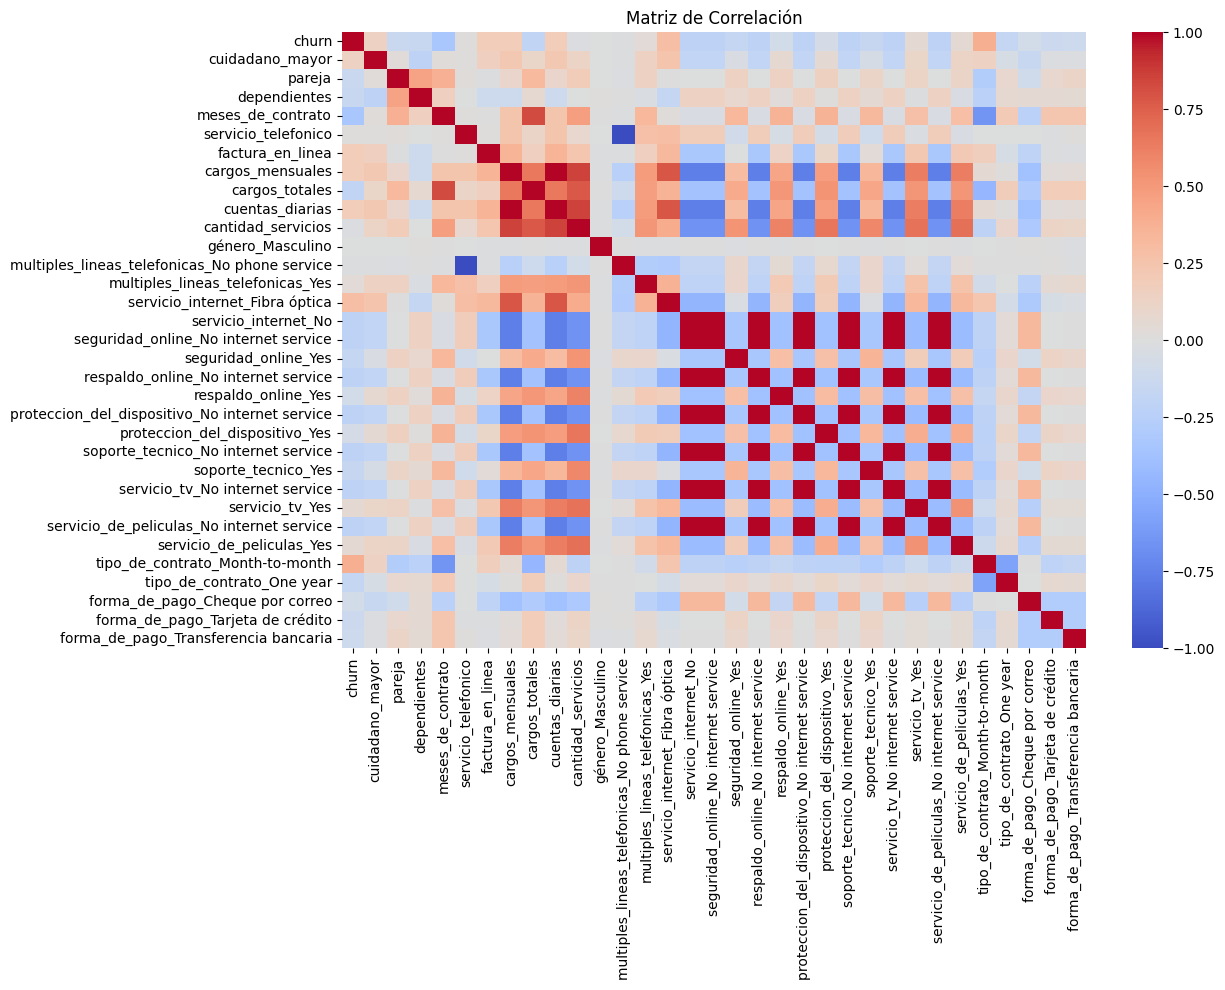

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()


### *7. Análisis Dirigido*

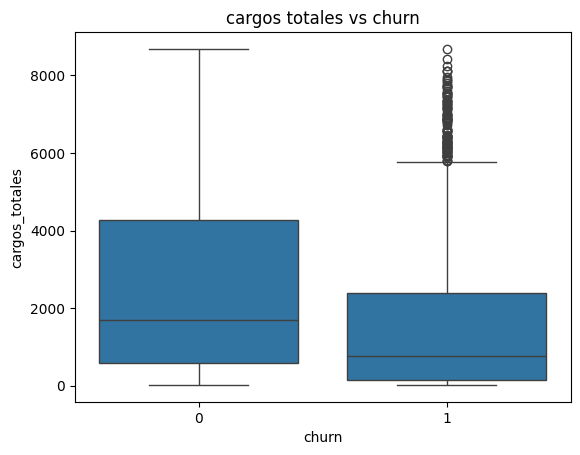

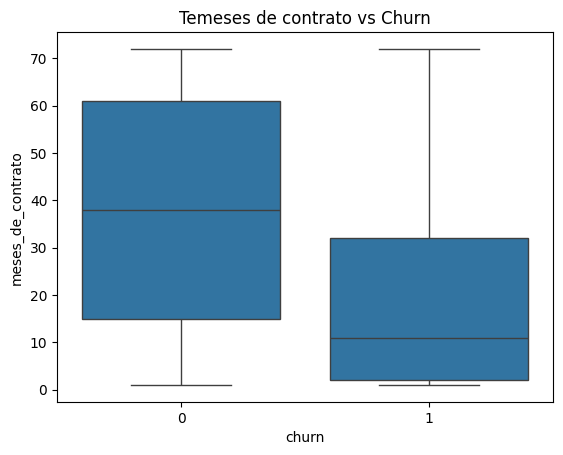

In [14]:
sns.boxplot(data=df, x='churn', y='cargos_totales')
plt.title("cargos totales vs churn")
plt.show()

sns.boxplot(data=df, x='churn', y='meses_de_contrato')
plt.title("Temeses de contrato vs Churn")
plt.show()


## *Modelado Predictivo*

### *8. Separación de Datos*

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.3, random_state=42)


### *9. Creación de Modelos*





#### *Modelo 1: Regresión Logística*

In [16]:
from sklearn.linear_model import LogisticRegression ##

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

#### *Modelo 2: Random Forest (no requiere normalización, usar X_res directamente)*

In [17]:
from sklearn.ensemble import RandomForestClassifier

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf, y_train_rf)


RandomForestClassifier()

### *10. Evaluación de los Modelos*

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Regresión Logística
print("Regresión Logística:")
print(confusion_matrix(y_test, log_model.predict(X_test)))
print(classification_report(y_test, log_model.predict(X_test)))

# Random Forest
print("Random Forest:")
print(confusion_matrix(y_test_rf, rf_model.predict(X_test_rf)))
print(classification_report(y_test_rf, rf_model.predict(X_test_rf)))


Regresión Logística:
[[1302  266]
 [ 312 1218]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1568
           1       0.82      0.80      0.81      1530

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098

Random Forest:
[[1274  294]
 [ 259 1271]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1568
           1       0.81      0.83      0.82      1530

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



## *Interpretación y Conclusiones*

### *11. Análisis de la Importancia de las Variables*

In [19]:
# Regresión Logística
importance_log = pd.Series(log_model.coef_[0], index=X.columns)
print("Importancia en Regresión Logística:\n", importance_log.sort_values(ascending=False))

# Random Forest
importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Importancia en Random Forest:\n", importance_rf.sort_values(ascending=False))


Importancia en Regresión Logística:
 multiples_lineas_telefonicas_Yes                  1.819780
servicio_de_peliculas_Yes                         1.656181
proteccion_del_dispositivo_Yes                    1.601377
servicio_tv_Yes                                   1.587012
respaldo_online_Yes                               1.582203
seguridad_online_Yes                              1.391145
soporte_tecnico_Yes                               1.380936
cuentas_diarias                                   1.113359
cargos_mensuales                                  1.113359
tipo_de_contrato_Month-to-month                   0.692541
cargos_totales                                    0.430184
tipo_de_contrato_One year                         0.326195
servicio_telefonico                               0.229890
género_Masculino                                  0.100420
factura_en_linea                                  0.066628
cuidadano_mayor                                   0.012736
forma_de_pago_Tarje

### *12. Conclusión*

##Conclusiones del Proyecto

A partir del análisis realizado en el Challenge Telecom X – Parte 2, se pueden extraer las siguientes conclusiones clave:

- **El comportamiento de cancelación (churn) no está distribuido equitativamente**, por lo que fue necesario aplicar técnicas de balanceo como SMOTE para asegurar una buena capacidad predictiva de los modelos.

- **Los clientes con contratos mensuales presentan una mayor tasa de cancelación**, lo que sugiere que ofrecer planes anuales o de mayor duración puede mejorar la retención.

- **Un menor número de servicios contratados está directamente relacionado con una mayor probabilidad de churn**. Esto indica que los paquetes con múltiples servicios pueden ser una herramienta efectiva para reducir la evasión.

- **El tiempo de permanencia (tenure) tiene una fuerte correlación inversa con el churn**. Los clientes nuevos tienden a cancelar más frecuentemente, por lo que es clave prestar atención especial durante los primeros meses.

- **Los cargos mensuales y diarios más altos se asocian con mayor churn**, lo cual sugiere que una estructura de tarifas más flexible o descuentos por fidelidad pueden impactar positivamente la retención.

- En cuanto al rendimiento de los modelos:
  - La **Regresión Logística** mostró buen desempeño y permitió interpretar la influencia de cada variable.
  - El **Random Forest** ofreció resultados sólidos y reveló la importancia relativa de las características más influyentes en las decisiones de cancelación.

Estas conclusiones respaldan la necesidad de un enfoque proactivo en la gestión de clientes, permitiendo a la empresa anticiparse a la pérdida de usuarios y diseñar estrategias de retención basadas en datos reales.
